
Dataset Shape: (768, 9)

First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancie

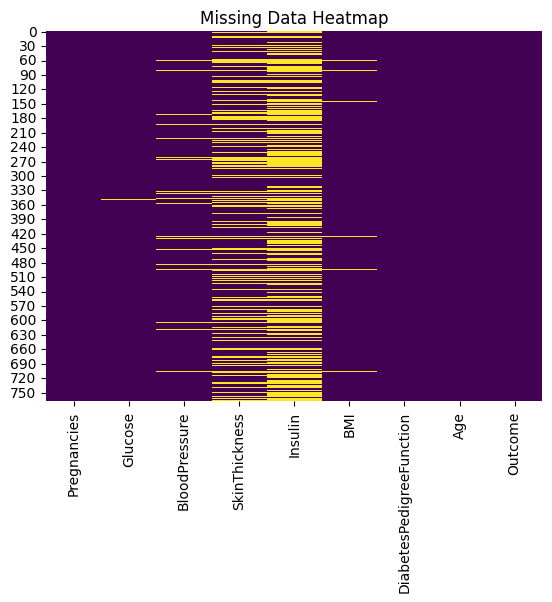


Missing Values After Imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


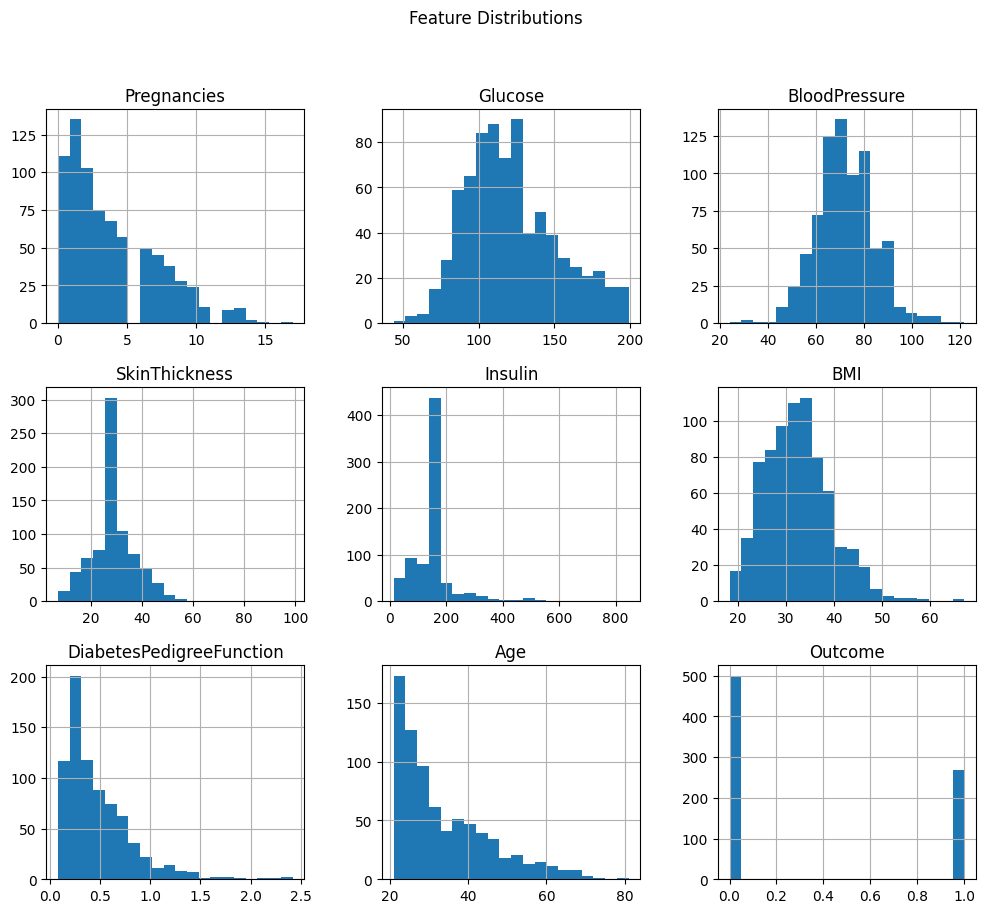

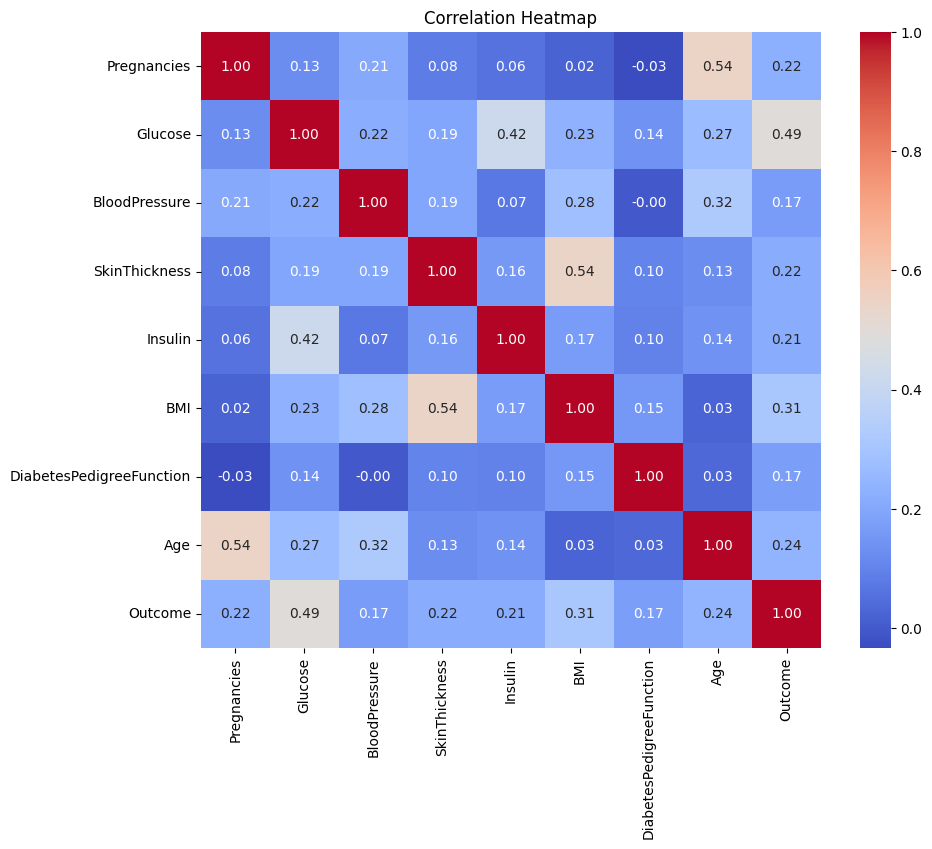


Model Accuracy: 0.6948051948051948

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.81      0.78       100
         1.0       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154


Confusion Matrix:
 [[81 19]
 [28 26]]


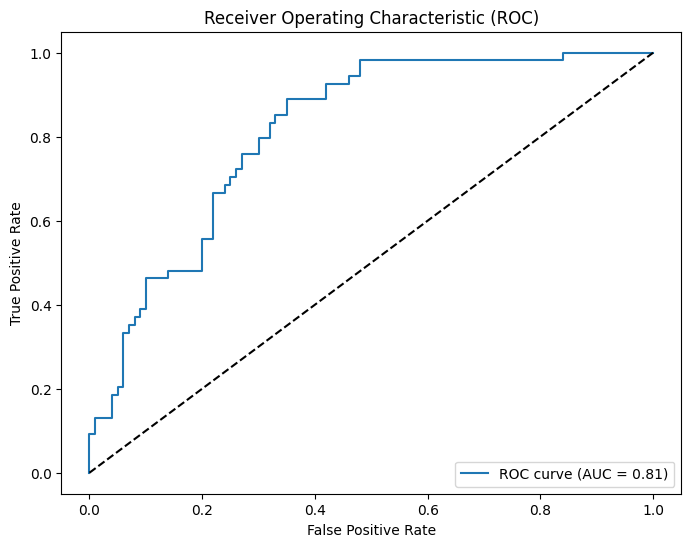


Model and scaler saved as 'diabetes_logreg_model.pkl' and 'scaler.pkl'.

Sample 1 Prediction: Diabetic
Sample 2 Prediction: Non-diabetic


In [1]:
# ===========================================================
# Transforming Healthcare with AI-Powered Disease Prediction
# Pima Indians Diabetes Database
# ===========================================================

import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
import joblib

warnings.filterwarnings('ignore', category=ConvergenceWarning)

# ===============================================
# 1. Dataset Description
# ===============================================
df = pd.read_csv('diabetes.csv')

print("\nDataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData Types and Non-Null Counts:")
print(df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values Count:\n", df.isnull().sum())

# ===============================================
# 2. Data Preprocessing
# ===============================================
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nZero values count:")
for col in zero_cols:
    print(f"{col}: {(df[col] == 0).sum()}")

# Replace zeros with NaN
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nMissing Values After Imputation:\n", df_imputed.isnull().sum())

# ===============================================
# 3. Exploratory Data Analysis (EDA)
# ===============================================
# Univariate analysis - histograms
df_imputed.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# ===============================================
# 4. Feature Engineering
# ===============================================
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================================
# 5. Model Building
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train, y_train)

# ===============================================
# 6. Model Evaluation
# ===============================================
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# ===============================================
# 7. Save Model and Scaler
# ===============================================
joblib.dump(model, 'diabetes_logreg_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\nModel and scaler saved as 'diabetes_logreg_model.pkl' and 'scaler.pkl'.")

# ===============================================
# 8. Predict on New Data
# ===============================================
def predict_diabetes(input_data):
    """
    Predicts diabetes based on input features.
    input_data: list of 8 values [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age]
    """
    input_df = pd.DataFrame([input_data], columns=X.columns)
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    return 'Diabetic' if prediction[0] == 1 else 'Non-diabetic'

# Example predictions
sample1 = [6, 148, 72, 35, 0, 33.6, 0.627, 50]
sample2 = [1, 85, 66, 29, 0, 26.6, 0.351, 31]

print("\nSample 1 Prediction:", predict_diabetes(sample1))
print("Sample 2 Prediction:", predict_diabetes(sample2))